## Match result dropna

In [1]:
import cv2
import math
import time
import json
import glob
import seaborn as sn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def plot_confusion_matrix(confusion_matrix,index,columns,x_label,y_label):
        df_cm = pd.DataFrame(confusion_matrix, index, columns)
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
        #sns.set(font_scale=1.4)
        #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        accuracy = sum(sum(np.eye(confusion_matrix.shape[0], dtype=int)*confusion_matrix))/sum(sum(confusion_matrix))
        plt.title("Accuracy:{}%\nComparison Matrix".format(round(accuracy*100,3)))
        plt.xlabel('{}'.format(x_label) , fontsize=18)
        plt.ylabel('{}'.format(y_label), fontsize=18)
        plt.show()
        
def get_accuracy_recallrate(array,raw):
    for index,class_ in enumerate(raw):
        class_predict_num = sum(array[:,index])
        class_true_num = sum(array[index])
        accuracy = array[index,index]/class_predict_num
        recall = array[index][index]/class_true_num
        print('Class {} Accuracy:{}% Recall_rate:{}%'.format(class_,round(accuracy*100,3),round(recall*100,3)))
        


In [3]:
Match_result_csv_path = '/root/notebooks/tooth_project/tooth_xray_segmention/PBL_detection/csv_file/PBL_match_result.csv'

In [4]:
Match_result_csv = pd.read_csv(Match_result_csv_path)

In [5]:
Match_result_dropna = Match_result_csv.dropna()
#Match_result_dropna = Match_result_csv.loc[(Match_result_csv['Image_name'] == image_name)]
Match_result_dropna.to_csv('../csv_file/Match_result_dropna.csv')

In [6]:
Ground_truth_stage = Match_result_dropna['state']
PBL_predict_stage = Match_result_dropna['PBL_stage']

In [7]:
print(len(Ground_truth_stage) == len(PBL_predict_stage))
print(len(Ground_truth_stage))

True
1022


In [8]:
Ground_truth_stage_list = list(Ground_truth_stage) 
PBL_predict_stage_list = list(PBL_predict_stage) 

In [9]:
print(set(Ground_truth_stage_list))
print(set(PBL_predict_stage_list))

{0, 1, 2, 3, -999}
{'-999', 'No_match', '1', '0', '2', '3'}


In [10]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count0 = 0
count1 = 0
count2 = 0
count3 = 0
count999 = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    Ground_truth_stage_list_clean.append(G)
    if P == -999:
        PBL_predict_stage_list_clean.append(-999)
    elif P == 'No_match':
        PBL_predict_stage_list_clean.append(-888)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    if P!=-999 and P!='No_match':
        if G==0 and int(P)==0:
            count0+=1
        elif G==1 and int(P)==1:
            count1+=1
        elif G==2 and int(P)==2:
            count2+=1
        elif G==3 and int(P)==3:
            count3+=1
            
print(count0)
print(count1)
print(count2)
print(count3)

83
129
20
21


In [11]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, 1, 2, 3, -999}
{0, 1, 2, 3, -888, -999}


In [12]:
print(len(Ground_truth_stage_list_clean),len(PBL_predict_stage_list_clean))


1022 1022


In [13]:
from sklearn.metrics import confusion_matrix
array_5  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

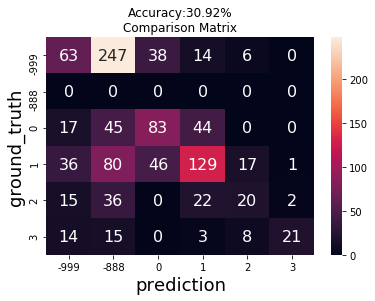

Class -999 Accuracy:43.448% Recall_rate:17.12%
Class -888 Accuracy:0.0% Recall_rate:nan%
Class 0 Accuracy:49.701% Recall_rate:43.915%
Class 1 Accuracy:60.849% Recall_rate:41.748%
Class 2 Accuracy:39.216% Recall_rate:21.053%
Class 3 Accuracy:87.5% Recall_rate:34.426%


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [14]:
raw_5 = ['-999','-888','0','1','2','3']
columns_5 = ['-999','-888','0','1','2','3']
plot_confusion_matrix(array_5,raw_5,columns_5,'prediction','ground_truth')
get_accuracy_recallrate(array_5,raw_5)

83
129
20
21
{0, 1, 2, 3, -999}
{0, 1, 2, 3, -999}
599 599


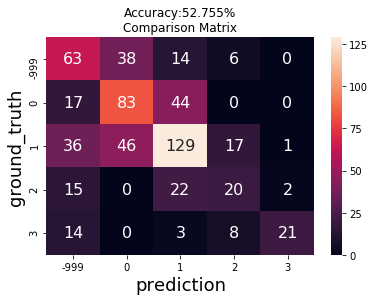

Class -999 Accuracy:43.448% Recall_rate:52.066%
Class 0 Accuracy:49.701% Recall_rate:57.639%
Class 1 Accuracy:60.849% Recall_rate:56.332%
Class 2 Accuracy:39.216% Recall_rate:33.898%
Class 3 Accuracy:87.5% Recall_rate:45.652%


In [15]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count0 = 0
count1 = 0
count2 = 0
count3 = 0
count999 = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    if P == -999:
        PBL_predict_stage_list_clean.append(-999)
        Ground_truth_stage_list_clean.append(G)
    elif P == 'No_match':
        #PBL_predict_stage_list_clean.append(-999)
        pass
    else:
        PBL_predict_stage_list_clean.append(int(P))
        Ground_truth_stage_list_clean.append(G)
    
    if P!=-999 and P!='No_match':
        if G==0 and int(P)==0:
            count0+=1
        elif G==1 and int(P)==1:
            count1+=1
        elif G==2 and int(P)==2:
            count2+=1
        elif G==3 and int(P)==3:
            count3+=1
            
print(count0)
print(count1)
print(count2)
print(count3)

print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

print(len(Ground_truth_stage_list_clean),len(PBL_predict_stage_list_clean))

from sklearn.metrics import confusion_matrix
array_5  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

raw_5 = ['-999','0','1','2','3']
columns_5 = ['-999','0','1','2','3']
plot_confusion_matrix(array_5,raw_5,columns_5,'prediction','ground_truth')
get_accuracy_recallrate(array_5,raw_5)

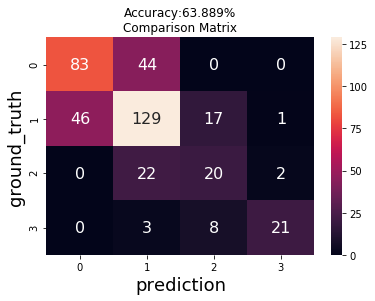

Class 0 Accuracy:64.341% Recall_rate:65.354%
Class 1 Accuracy:65.152% Recall_rate:66.839%
Class 2 Accuracy:44.444% Recall_rate:45.455%
Class 3 Accuracy:87.5% Recall_rate:65.625%


In [16]:
only_stage = array_5[1:, 1:]
raw_only_stage = ['0','1','2','3']
columns_only_stage = ['0','1','2','3']
plot_confusion_matrix(only_stage,raw_only_stage,columns_only_stage,'prediction','ground_truth')
get_accuracy_recallrate(only_stage,raw_only_stage)

In [17]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, 1, 2, 3, -999}
{0, 1, 2, 3, -999}


In [18]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    if G==1 or G==0:
        Ground_truth_stage_list_clean.append(0)
    else:
        Ground_truth_stage_list_clean.append(G)
    
    if P == 'False':
        PBL_predict_stage_list_clean.append(-999)
    elif P == 'No_match':
        PBL_predict_stage_list_clean.append(-888)
    elif int(P) ==1 or int(P) ==0:
        PBL_predict_stage_list_clean.append(0)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    
    if P!='False' and P!='No_match':
        if G==2 and int(P)==2:
            count+=1
print(count)

20


In [19]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, -999, 2, 3}
{0, 2, 3, -888, -999}


In [20]:
from sklearn.metrics import confusion_matrix

array_4  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

(5, 5)


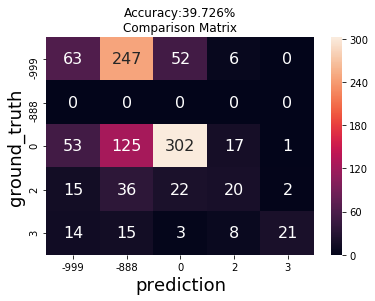

Class -999 Accuracy:43.448% Recall_rate:17.12%
Class -888 Accuracy:0.0% Recall_rate:nan%
Class 0 Accuracy:79.683% Recall_rate:60.643%
Class 2 Accuracy:39.216% Recall_rate:21.053%
Class 3 Accuracy:87.5% Recall_rate:34.426%


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [21]:
raw_4 = ['-999','-888','0','2','3']
columns_4 = ['-999','-888','0','2','3']
print(array_4.shape)
plot_confusion_matrix(array_4,raw_4,columns_4,'prediction','ground_truth')
get_accuracy_recallrate(array_4,raw_4)

20
{0, -999, 2, 3}
{0, -999, 2, 3}
(4, 4)


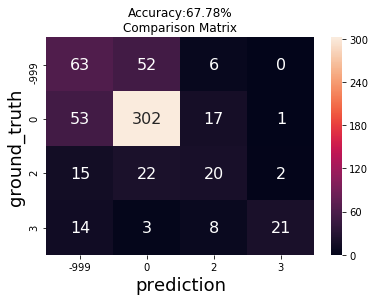

Class -999 Accuracy:43.448% Recall_rate:52.066%
Class 0 Accuracy:79.683% Recall_rate:80.965%
Class 2 Accuracy:39.216% Recall_rate:33.898%
Class 3 Accuracy:87.5% Recall_rate:45.652%


In [22]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):  
    if P == 'False':
        PBL_predict_stage_list_clean.append(-999)
        if G==1 or G==0:
            Ground_truth_stage_list_clean.append(0)
        else:
            Ground_truth_stage_list_clean.append(G)
    elif P == 'No_match':
        #PBL_predict_stage_list_clean.append(-999)
        pass
    elif int(P) ==1 or int(P) ==0:
        PBL_predict_stage_list_clean.append(0)
        if G==1 or G==0:
            Ground_truth_stage_list_clean.append(0)
        else:
            Ground_truth_stage_list_clean.append(G)
    else:
        PBL_predict_stage_list_clean.append(int(P))
        if G==1 or G==0:
            Ground_truth_stage_list_clean.append(0)
        else:
            Ground_truth_stage_list_clean.append(G)
    
    
    if P!='False' and P!='No_match':
        if G==2 and int(P)==2:
            count+=1
print(count)

print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

from sklearn.metrics import confusion_matrix

array_4  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

raw_4 = ['-999','0','2','3']
columns_4 = ['-999','0','2','3']
print(array_4.shape)
plot_confusion_matrix(array_4,raw_4,columns_4,'prediction','ground_truth')
get_accuracy_recallrate(array_4,raw_4)

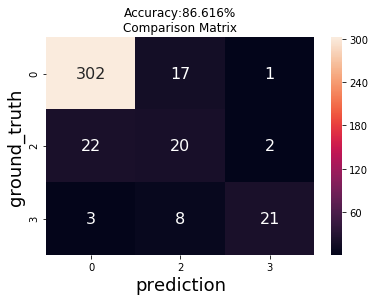

Class 0 Accuracy:92.355% Recall_rate:94.375%
Class 2 Accuracy:44.444% Recall_rate:45.455%
Class 3 Accuracy:87.5% Recall_rate:65.625%


In [23]:
only_stage = array_4[1:, 1:]
raw_only_stage = ['0','2','3']
columns_only_stage = ['0','2','3']
plot_confusion_matrix(only_stage,raw_only_stage,columns_only_stage,'prediction','ground_truth')
get_accuracy_recallrate(only_stage,raw_only_stage)

In [24]:
get_accuracy_recallrate(array_4,raw_4)

Class -999 Accuracy:43.448% Recall_rate:52.066%
Class 0 Accuracy:79.683% Recall_rate:80.965%
Class 2 Accuracy:39.216% Recall_rate:33.898%
Class 3 Accuracy:87.5% Recall_rate:45.652%


In [25]:
#2D x:stage y:pbl_value


In [26]:
Ground_truth_stage = Match_result_dropna['state']
#Ground_truth_stage = Match_result_dropna['PBL_stage']
PBL_predict_PBL_value = Match_result_dropna['PBL_value']
print(len(Ground_truth_stage))
print(len(PBL_predict_PBL_value))

1022
1022


In [27]:
# print(set(Ground_truth_stage))
# print(set(PBL_predict_PBL_value))

In [28]:
y_Ground_truth_stage_list_clean = []
x_PBL_predict_PBL_value_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage,PBL_predict_PBL_value):
    if G == -999 or P=='No_match' or P=='-999.0' or float(P) > 100:
        pass
    else:
        y_Ground_truth_stage_list_clean.append(G)
        x_PBL_predict_PBL_value_list_clean.append(int(float(P)))
        count+=1
        if int(float(P)) > 50:
            print(int(float(P)))
print(count)

63
395


In [29]:
# print(set(y_Ground_truth_stage_list_clean))
# print(set(x_PBL_predict_PBL_value_list_clean))

In [30]:
c0 = y_Ground_truth_stage_list_clean.count(0)
c1 = y_Ground_truth_stage_list_clean.count(1)
c2 = y_Ground_truth_stage_list_clean.count(2)
c3 = y_Ground_truth_stage_list_clean.count(3)
cs = c0+c1+c2+c3
print(round((c0*100/cs),3),'%')
print(round((c1*100/cs),3),'%')
print(round((c2*100/cs),3),'%')
print(round((c3*100/cs),3),'%')


32.152 %
48.861 %
10.886 %
8.101 %


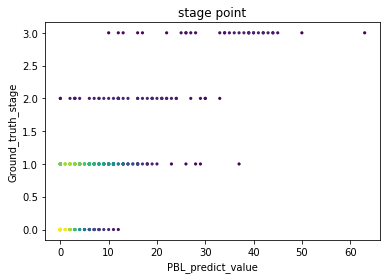

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = x_PBL_predict_PBL_value_list_clean
y = y_Ground_truth_stage_list_clean

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

In [32]:
# print(set(y_Ground_truth_stage_list_clean))
# print(set(x_PBL_predict_PBL_value_list_clean))
# print(len(x_PBL_predict_PBL_value_list_clean))

In [33]:
#stage 0,1,2,3
x0,y0 = [],[]
x1,y1 = [],[]
x2,y2 = [],[]
x3,y3 = [],[]
for x,y in zip(x_PBL_predict_PBL_value_list_clean,y_Ground_truth_stage_list_clean):
    if y == 0:
        x0.append(x)
        y0.append(y)
    elif y == 1:
        x1.append(x)
        y1.append(y)
    elif y == 2:
        x2.append(x)
        y2.append(y)
    elif y == 3:
        x3.append(x)
        y3.append(y)
x0count = x0.copy()
y0count = y0.copy()
x1count = x1.copy()
y1count = y1.copy()
x2count = x2.copy()
y2count = y2.copy()
x3count = x3.copy()
y3count = y3.copy()

x0.append(0)
y0.append(1)
x1.append(0)
y1.append(0)
x2.append(0)
y2.append(0)
x3.append(0)
y3.append(0)


In [34]:
print(y0count)
print(y1count)
print(y2count)
print(y3count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

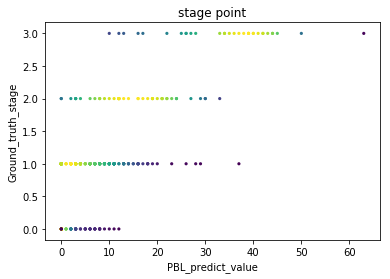

In [35]:
# Generate fake data

# Calculate the point density
xy0 = np.vstack([x0,y0])
z0 = gaussian_kde(xy0)(xy0)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
xy3 = np.vstack([x3,y3])
z3 = gaussian_kde(xy3)(xy3)

fig, ax = plt.subplots()
ax.scatter(x0, y0, c=z0, s=10, edgecolor='')
ax.scatter(x1, y1, c=z1, s=10, edgecolor='')
ax.scatter(x2, y2, c=z2, s=10, edgecolor='')
ax.scatter(x3, y3, c=z3, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

In [36]:
print(len(x0count))
print(len(x1count))
print(len(x2count))
print(len(x3count))
print(x0count)

127
193
43
32
[0, 3, 6, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 5, 6, 5, 9, 8, 3, 10, 3, 7, 12, 6, 7, 7, 0, 11, 5, 0, 2, 4, 0, 3, 0, 0, 0, 3, 0, 0, 0, 4, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 6, 0, 0, 0, 0, 0, 0]


[98, 13, 12, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[70, 32, 32, 30, 11, 8, 5, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 4, 3, 8, 3, 5, 6, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 2, 2, 0, 1, 3, 2, 0, 4, 3, 6, 5, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 1080x576 with 0 Axes>

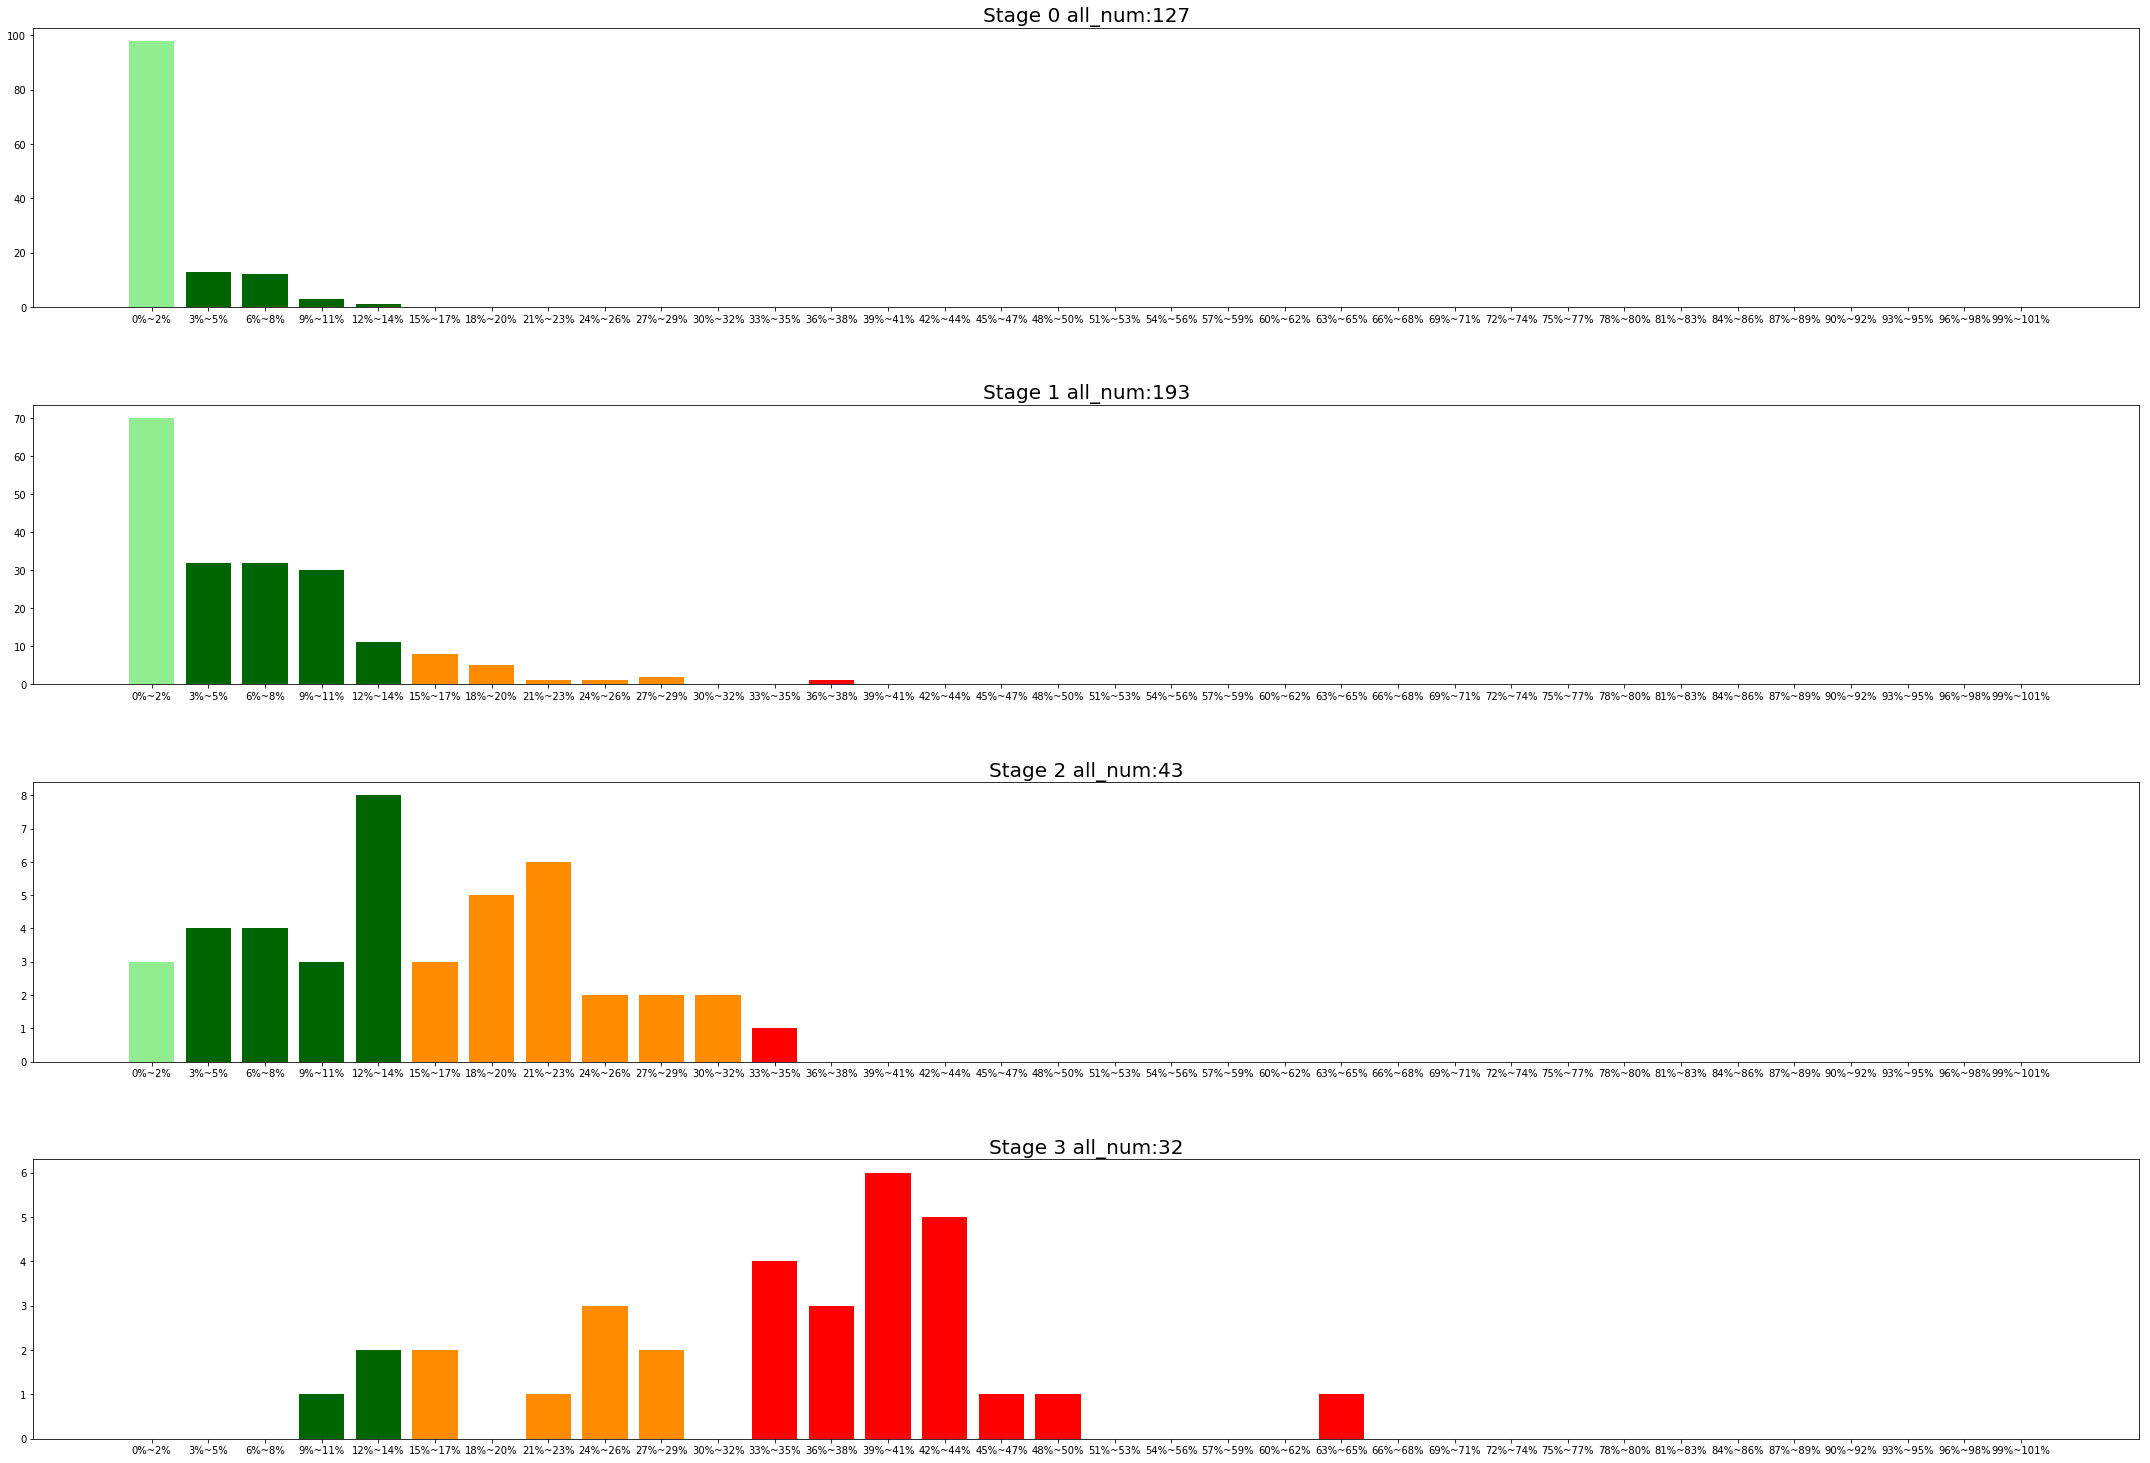

In [37]:
import matplotlib.pyplot as plt

def stage_(i):
    if i == 0:
        return 0
    elif i < 15:
        return 1
    elif i < 33:
        return 2
    elif i >= 33:
        return 3
    
def get_value_count(list_,min_,max_):
    count = 0
    for i in range(min_,max_+1):
        count = list_.count(i)+count
    return count

dict_ = {0:'lightgreen',1:'darkgreen',2:'darkorange',3:'r',}
color = [dict_[stage_(i*3)] for i in range(34)]

x = ['{}%~{}%'.format(i*3,(i+1)*3-1) for i in range(34)]

y0count = [ get_value_count(x0count,i*3,(i+1)*3-1) for i in range(34)] 
y1count = [ get_value_count(x1count,i*3,(i+1)*3-1) for i in range(34)] 
y2count = [ get_value_count(x2count,i*3,(i+1)*3-1) for i in range(34)] 
y3count = [ get_value_count(x3count,i*3,(i+1)*3-1) for i in range(34)] 

fig = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(4, 1)
ax[0].bar(x, y0count, color = color)
ax[1].bar(x, y1count, color = color)
ax[2].bar(x, y2count, color = color)
ax[3].bar(x, y3count, color = color)

ax[0].set_title("Stage 0 all_num:{}".format(sum(y0count)), fontsize=20)
ax[1].set_title("Stage 1 all_num:{}".format(sum(y1count)), fontsize=20)
ax[2].set_title("Stage 2 all_num:{}".format(sum(y2count)), fontsize=20)
ax[3].set_title("Stage 3 all_num:{}".format(sum(y3count)), fontsize=20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=5, 
                    wspace=8, 
                    hspace=0.35)

print(y0count)
print(y1count)
print(y2count)
print(y3count)

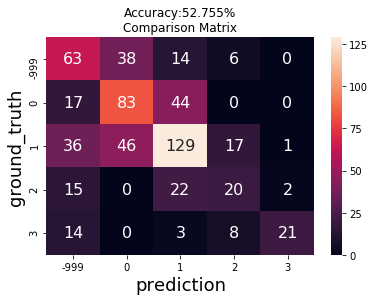

In [38]:
plot_confusion_matrix(array_5,raw_5,columns_5,'prediction','ground_truth')

In [39]:
sum(sum(array_5))

599

## Count all the tooth that the model cannot find

In [40]:
Match_result_csv.values

array([[0, 'NN_190619_104716_EA3E9', '8M', ..., nan, nan, nan],
       [1, 'NN_190619_104716_EA3E9', '9M', ..., nan, nan, nan],
       [2, 'NN_190619_104716_EA3E9', '9D', ..., nan, nan, nan],
       ...,
       [23016, 'NN_160425_141130_EA4F1', '22M', ..., nan, nan, nan],
       [23017, 'NN_160425_141130_EA4F1', '22D', ..., nan, nan, nan],
       [23018, 'NN_160425_141130_EA4F1', '21M', ..., nan, nan, nan]],
      dtype=object)

In [41]:
All_tooth_name = list(Match_result_dropna['image_name'])

In [42]:
All_tooth_name_set = list(set(All_tooth_name))
print(len(All_tooth_name_set))

156


In [43]:
human_can_detect = Match_result_csv['state']
model_can_detect = Match_result_csv['PBL_stage']
print(len(human_can_detect) == len(model_can_detect))
print(len(human_can_detect))
human_can_detect_list = list(human_can_detect) 
model_can_detect_list = list(model_can_detect) 
print(set(Ground_truth_stage_list))
print(set(PBL_predict_stage_list))

True
23019
{0, 1, 2, 3, -999}
{'-999', 'No_match', '1', '0', '2', '3'}


In [44]:
human_can_detect = []
model_can_detect = []

for tooth_name in tqdm(sorted(All_tooth_name_set),total = len(All_tooth_name_set)):
    #print(tooth_name)
    tooth_info = Match_result_csv.loc[Match_result_csv['image_name'] == '{}'.format(tooth_name)]
    #print(tooth_info)
    human_detect_info = tooth_info['state']
    model_detect_info = tooth_info['PBL_stage']
    for h,m in zip(human_detect_info,model_detect_info):
        if h == -999:
            human_can_detect.append(0)
        else:
            human_can_detect.append(1)
            
        if str(m) == 'No_match':
            model_can_detect.append(0)
        else:
            model_can_detect.append(1)

100%|██████████| 156/156 [00:00<00:00, 555.44it/s]


In [45]:
print(sum(human_can_detect))

654


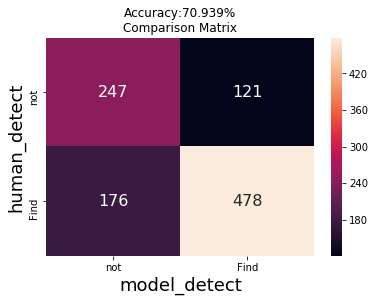

Missing rate 26.911314984709477 %


In [46]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(human_can_detect, model_can_detect)

index = ['not','Find']
columns = ['not','Find']

plot_confusion_matrix(array,index,columns,x_label='model_detect',y_label='human_detect')

print('Missing rate',(array[1][0]/sum(array[1]))*100,'%')

In [47]:
path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/5_pattern_detection_result/*.PNG'
root_PBL_list = glob.glob(path)

In [48]:
wierd_data = Match_result_dropna.loc[(Match_result_dropna['PBL_value'] != 'No_match')]
#print(wierd_data)
#wierd_data = wierd_data.loc[wierd_data['PBL_value'].dtype() == 'int']
wierd_data['PBL_value'] = wierd_data['PBL_value'].astype(float) 
wierd_data = wierd_data.loc[wierd_data['PBL_value'] > 40 ]
print(wierd_data)

      Unnamed: 0               image_name tooth_num  state PBL_predict_tooth  \
292          292   NN_190923_111212_4B148       25D      3              25_L   
293          293   NN_190923_111212_4B148       25M      3              25_R   
1590        1590  NN__191111_145307_24202       12D      3              12_R   
1596        1596  NN__191111_145309_24203        9D      3               9_R   
1608        1608  NN__191111_145310_24205       25D      3              25_L   
1609        1609  NN__191111_145310_24205       25M      3              25_R   
1610        1610  NN__191111_145310_24205       24M      3              24_L   
1677        1677  NN__191111_145403_2420D       14D      3              14_R   
1678        1678  NN__191111_145403_2420D       15M      3              15_L   
2592        2592  NN_161012_110111_C03830       19D      2              19_R   
3667        3667  NN_130821_101425_C057C0       16D      3              16_R   
5045        5045  NN_090903_154103_C0748

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
for i in wierd_data['image_name']:
    print(i)

NN_190923_111212_4B148
NN_190923_111212_4B148
NN__191111_145307_24202
NN__191111_145309_24203
NN__191111_145310_24205
NN__191111_145310_24205
NN__191111_145310_24205
NN__191111_145403_2420D
NN__191111_145403_2420D
NN_161012_110111_C03830
NN_130821_101425_C057C0
NN_090903_154103_C07484


NN_190923_111212_4B148 5


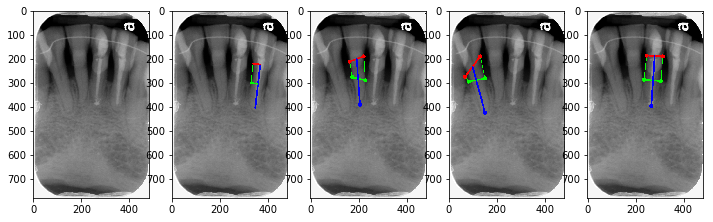

NN_190923_111212_4B148 5


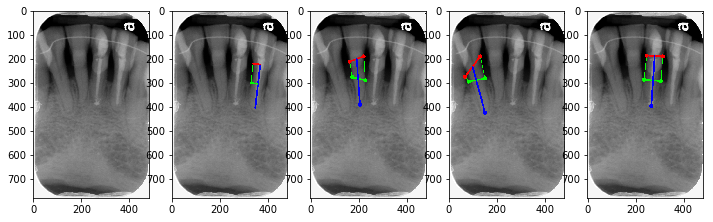

NN__191111_145307_24202 5


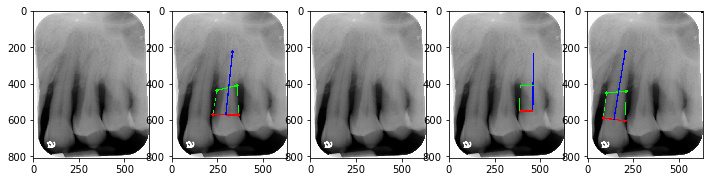

NN__191111_145309_24203 3


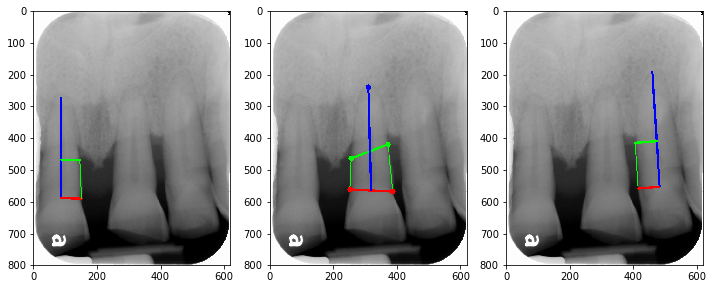

NN__191111_145310_24205 5


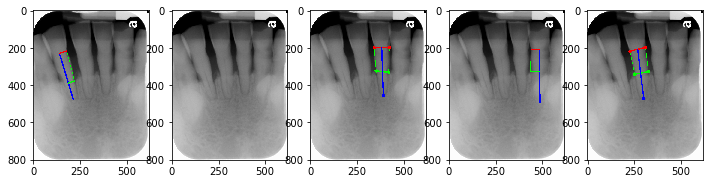

NN__191111_145310_24205 5


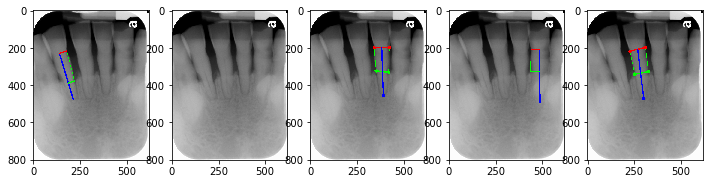

NN__191111_145310_24205 5


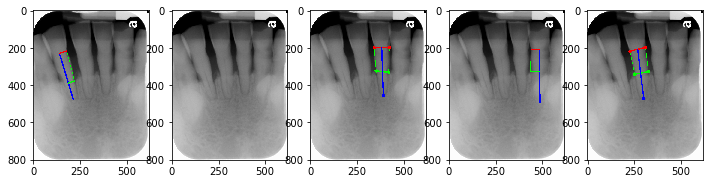

NN__191111_145403_2420D 4


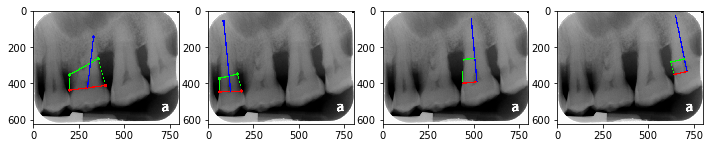

NN__191111_145403_2420D 4


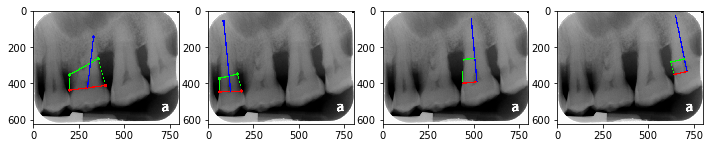

NN_161012_110111_C03830 2


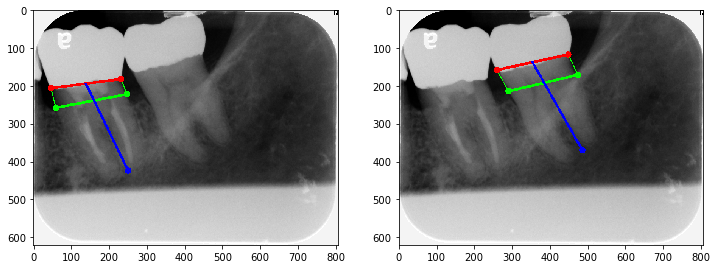

NN_130821_101425_C057C0 2


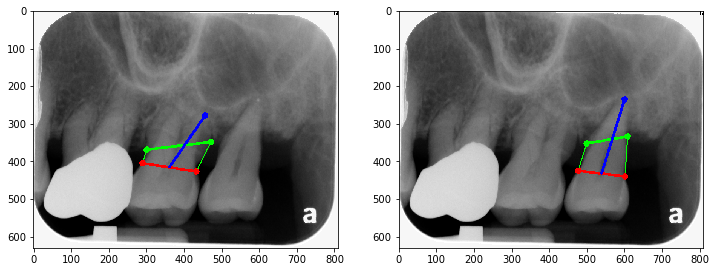

NN_090903_154103_C07484 4


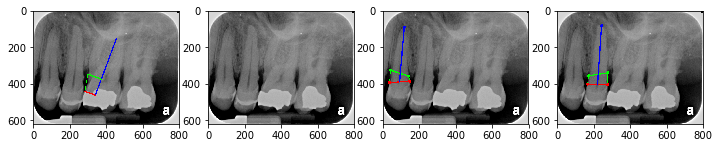

In [50]:
for wierd_image_name in wierd_data['image_name']:
    root_list = [root for root in root_PBL_list if wierd_image_name in root]
    print(wierd_image_name,len(root_list))
    plt.figure(figsize=(12,8))
    for index,image_path in enumerate(root_list):
        plt.subplot(1,len(root_list),index+1)
        plt.imshow(cv2.imread(image_path))
    plt.show()